#Analise, Tratamento e Treinamento

Iremos fazer treinar um modelo com base de dados do Spotify sobre musicas:

**song_name**: O nome da música.

**song_popularity**: A popularidade da música, posições em paradas musicais, etc.

**song_duration_ms**: A duração da música em milissegundos.

**acousticness**: Uma medida que varia de 0 a 1, indicando a probabilidade de a música ser acústica. Quanto mais próximo de 1, mais acústica é a música.

**danceability**: Uma medida que varia de 0 a 1, indicando o quão adequada uma música é para dançar, com base em elementos como ritmo, força do ritmo, etc. Quanto maior o valor, mais adequada para dançar é a música.

**energy**: Uma medida que varia de 0 a 1, indicando o quão enérgica é a música. Músicas com alta energia geralmente são rápidas, barulhentas e intensas, enquanto músicas com baixa energia tendem a ser mais calmas e tranquilas.

**instrumentalness**: Uma medida que varia de 0 a 1, indicando a probabilidade de a música não conter vocais. Quanto mais próximo de 1, mais instrumental é a música.

**key**: A tonalidade da música, representada como um número inteiro de 0 a 11, onde 0 representa a nota C, 1 representa C#, e assim por diante.

**liveness**: Uma medida que varia de 0 a 1, indicando a probabilidade de a música ter sido gravada ao vivo. Quanto mais próximo de 1, mais provável é que a música seja uma gravação ao vivo.

**loudness**: O volume médio da música em decibéis (dB), uma medida de amplitude do som.

**audio_mode**: Indica o modo da música, se é maior (0) ou menor (1).

**speechiness**: Uma medida que varia de 0 a 1, indicando a presença de elementos de fala na música. Quanto maior o valor, mais a música se assemelha a uma gravação de fala.

**tempo**: O ritmo da música em batidas por minuto (BPM), ou seja, quantas batidas ocorrem em um minuto.

**time_signature**: A assinatura de tempo da música, indicando quantas batidas ocorrem em cada medida.

**audio_valence**: Uma medida que varia de 0 a 1, indicando o quão positiva ou feliz é a música. Quanto maior o valor, mais positiva é a música; quanto menor, mais negativa.

In [223]:
import pandas as pd
spotify = pd.read_csv("/content/spotify.csv")
spotify

,Unnamed: 0,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,Boulevard of Broken Dreams,73,262333,0.005520000000000001kg,0.496mol/L,0.682,2.94E-05,8.0,0.0589,-4.095,1,0.0294,167.06,4,0.474
1,1,In The End,66,216933,0.0103kg,0.542mol/L,0.853,0,3.0,0.108,-6.407,0,0.0498,105.256,4,0.370
2,2,Seven Nation Army,76,231733,0.00817kg,0.737mol/L,0.463,0.447,0.0,0.255,-7.828,1,0.0792,123.881,4,0.324
3,3,By The Way,74,216933,0.0264kg,0.451mol/L,0.97,0.00355,0.0,0.102,-4.938,1,0.107,122.444,4,0.198
4,4,How You Remind Me,56,223826,0.000954kg,0.447mol/L,0.766,0,10.0,0.113,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,18830,Let It Breathe,60,159645,0.893kg,0.5mol/L,0.151,6.54E-05,11.0,0.111,-16.107,1,0.0348,113.969,4,0.300
18831,18831,Answers,60,205666,0.765kg,0.495mol/L,0.161,1.33E-06,11.0,0.105,-14.078,0,0.0301,94.286,4,0.265
18832,18832,Sudden Love (Acoustic),23,182211,0.847kg,0.7190000000000001mol/L,0.325,0,0.0,0.125,-12.222,1,0.0355,130.534,4,0.286
18833,18833,Gentle on My Mind,55,352280,0.945kg,0.488mol/L,0.326,0.0157,3.0,0.119,-12.02,1,0.0328,106.063,4,0.323


1. quantidade de dados e parâmetros

In [224]:
spotify.shape

(18835, 16)

2. uma amostra aleatoria

In [225]:
spotify.sample()

,Unnamed: 0,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
12987,12987,Informer,64,268910,0.0984kg,0.763mol/L,0.742,0,6.0,0.38,-10.975,0,0.188,98.145,4,0.483


3. tipos dos dados, a maioria esta como object msm sendo numeros, iremos tratar isso.

por exemplo:
- o instrumentalness que existe conotacao de potencia (E-05 ou E-06)
-Acousticness e danceability que provavelmente estão com erro de entrada (kg e mol/L)

In [226]:
spotify.dtypes

Unnamed: 0            int64
song_name            object
song_popularity      object
song_duration_ms     object
acousticness         object
danceability         object
energy               object
instrumentalness     object
key                 float64
liveness             object
loudness             object
audio_mode           object
speechiness          object
tempo                object
time_signature       object
audio_valence       float64
dtype: object

4. tratando os dados que tem string

##Limpeza e organizacao

In [227]:
spotify["acousticness"] = spotify["acousticness"].str.replace("kg", "")
spotify["danceability"] = spotify["danceability"].str.replace("mol/L", "")
spotify

,Unnamed: 0,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,Boulevard of Broken Dreams,73,262333,0.005520000000000001,0.496,0.682,2.94E-05,8.0,0.0589,-4.095,1,0.0294,167.06,4,0.474
1,1,In The End,66,216933,0.0103,0.542,0.853,0,3.0,0.108,-6.407,0,0.0498,105.256,4,0.370
2,2,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447,0.0,0.255,-7.828,1,0.0792,123.881,4,0.324
3,3,By The Way,74,216933,0.0264,0.451,0.97,0.00355,0.0,0.102,-4.938,1,0.107,122.444,4,0.198
4,4,How You Remind Me,56,223826,0.000954,0.447,0.766,0,10.0,0.113,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,18830,Let It Breathe,60,159645,0.893,0.5,0.151,6.54E-05,11.0,0.111,-16.107,1,0.0348,113.969,4,0.300
18831,18831,Answers,60,205666,0.765,0.495,0.161,1.33E-06,11.0,0.105,-14.078,0,0.0301,94.286,4,0.265
18832,18832,Sudden Love (Acoustic),23,182211,0.847,0.7190000000000001,0.325,0,0.0,0.125,-12.222,1,0.0355,130.534,4,0.286
18833,18833,Gentle on My Mind,55,352280,0.945,0.488,0.326,0.0157,3.0,0.119,-12.02,1,0.0328,106.063,4,0.323


1. Excluindo a tabela instrumentalness

In [228]:
spotify = spotify.drop('instrumentalness', axis=1)
spotify

,Unnamed: 0,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,Boulevard of Broken Dreams,73,262333,0.005520000000000001,0.496,0.682,8.0,0.0589,-4.095,1,0.0294,167.06,4,0.474
1,1,In The End,66,216933,0.0103,0.542,0.853,3.0,0.108,-6.407,0,0.0498,105.256,4,0.370
2,2,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.0,0.255,-7.828,1,0.0792,123.881,4,0.324
3,3,By The Way,74,216933,0.0264,0.451,0.97,0.0,0.102,-4.938,1,0.107,122.444,4,0.198
4,4,How You Remind Me,56,223826,0.000954,0.447,0.766,10.0,0.113,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,18830,Let It Breathe,60,159645,0.893,0.5,0.151,11.0,0.111,-16.107,1,0.0348,113.969,4,0.300
18831,18831,Answers,60,205666,0.765,0.495,0.161,11.0,0.105,-14.078,0,0.0301,94.286,4,0.265
18832,18832,Sudden Love (Acoustic),23,182211,0.847,0.7190000000000001,0.325,0.0,0.125,-12.222,1,0.0355,130.534,4,0.286
18833,18833,Gentle on My Mind,55,352280,0.945,0.488,0.326,3.0,0.119,-12.02,1,0.0328,106.063,4,0.323


2. Retirando o paramentro song_name para iniciar as visualizacoes e relacoes

In [229]:
music_name = spotify['song_name'][0]
spotify = spotify.drop('song_name', axis=1)

3. transformando todos os dados em int

In [230]:
for col in spotify.columns:
    if spotify[col].dtype == 'object':
        spotify[col] = pd.to_numeric(spotify[col], errors='coerce').fillna(0).astype(float)
spotify

,Unnamed: 0,song_popularity,song_duration_ms,acousticness,danceability,energy,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,73.0,262333.0,0.005520,0.496,0.682,8.0,0.0589,-4.095,1.0,0.0294,167.060,4.0,0.474
1,1,66.0,216933.0,0.010300,0.542,0.853,3.0,0.1080,-6.407,0.0,0.0498,105.256,4.0,0.370
2,2,76.0,231733.0,0.008170,0.737,0.463,0.0,0.2550,-7.828,1.0,0.0792,123.881,4.0,0.324
3,3,74.0,216933.0,0.026400,0.451,0.970,0.0,0.1020,-4.938,1.0,0.1070,122.444,4.0,0.198
4,4,56.0,223826.0,0.000954,0.447,0.766,10.0,0.1130,-5.065,1.0,0.0313,172.011,4.0,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,18830,60.0,159645.0,0.893000,0.500,0.151,11.0,0.1110,-16.107,1.0,0.0348,113.969,4.0,0.300
18831,18831,60.0,205666.0,0.765000,0.495,0.161,11.0,0.1050,-14.078,0.0,0.0301,94.286,4.0,0.265
18832,18832,23.0,182211.0,0.847000,0.719,0.325,0.0,0.1250,-12.222,1.0,0.0355,130.534,4.0,0.286
18833,18833,55.0,352280.0,0.945000,0.488,0.326,3.0,0.1190,-12.020,1.0,0.0328,106.063,4.0,0.323


In [231]:
spotify['loudness'] = spotify['loudness'].apply(lambda x: abs(x))
spotify

,Unnamed: 0,song_popularity,song_duration_ms,acousticness,danceability,energy,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,73.0,262333.0,0.005520,0.496,0.682,8.0,0.0589,4.095,1.0,0.0294,167.060,4.0,0.474
1,1,66.0,216933.0,0.010300,0.542,0.853,3.0,0.1080,6.407,0.0,0.0498,105.256,4.0,0.370
2,2,76.0,231733.0,0.008170,0.737,0.463,0.0,0.2550,7.828,1.0,0.0792,123.881,4.0,0.324
3,3,74.0,216933.0,0.026400,0.451,0.970,0.0,0.1020,4.938,1.0,0.1070,122.444,4.0,0.198
4,4,56.0,223826.0,0.000954,0.447,0.766,10.0,0.1130,5.065,1.0,0.0313,172.011,4.0,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,18830,60.0,159645.0,0.893000,0.500,0.151,11.0,0.1110,16.107,1.0,0.0348,113.969,4.0,0.300
18831,18831,60.0,205666.0,0.765000,0.495,0.161,11.0,0.1050,14.078,0.0,0.0301,94.286,4.0,0.265
18832,18832,23.0,182211.0,0.847000,0.719,0.325,0.0,0.1250,12.222,1.0,0.0355,130.534,4.0,0.286
18833,18833,55.0,352280.0,0.945000,0.488,0.326,3.0,0.1190,12.020,1.0,0.0328,106.063,4.0,0.323


In [232]:
spotify.dtypes

Unnamed: 0            int64
song_popularity     float64
song_duration_ms    float64
acousticness        float64
danceability        float64
energy              float64
key                 float64
liveness            float64
loudness            float64
audio_mode          float64
speechiness         float64
tempo               float64
time_signature      float64
audio_valence       float64
dtype: object

In [233]:
spotify.duplicated().sum()

0

4. Trocando os nomes para melhor entendimento

In [234]:
spotify = spotify.rename(columns={
    'song_popularity': 'popularidade_musica',
    'song_duration_ms': 'duracao_musica_ms',
    'acousticness': 'acustica',
    'danceability': 'dancabilidade',
    'energy': 'energia',
    'key': 'chave',
    'liveness': 'vivacidade',
    'loudness': 'volume',
    'audio_mode': 'modo_audio',
    'speechiness': 'fala',
    'tempo': 'ritmo',
    'time_signature': 'assinatura_tempo',
    'audio_valence': 'valencia_audio'
})

spotify.head()

,Unnamed: 0,popularidade_musica,duracao_musica_ms,acustica,dancabilidade,energia,chave,vivacidade,volume,modo_audio,fala,ritmo,assinatura_tempo,valencia_audio
0,0,73.0,262333.0,0.005520,0.496,0.682,8.0,0.0589,4.095,1.0,0.0294,167.060,4.0,0.474
1,1,66.0,216933.0,0.010300,0.542,0.853,3.0,0.1080,6.407,0.0,0.0498,105.256,4.0,0.370
2,2,76.0,231733.0,0.008170,0.737,0.463,0.0,0.2550,7.828,1.0,0.0792,123.881,4.0,0.324
3,3,74.0,216933.0,0.026400,0.451,0.970,0.0,0.1020,4.938,1.0,0.1070,122.444,4.0,0.198
4,4,56.0,223826.0,0.000954,0.447,0.766,10.0,0.1130,5.065,1.0,0.0313,172.011,4.0,0.574


In [235]:
spotify = spotify.drop('Unnamed: 0', axis=1)

##Gráficos

1. Histogramas da base

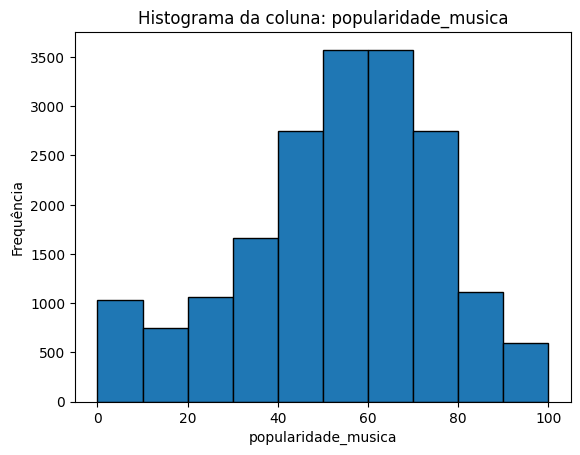

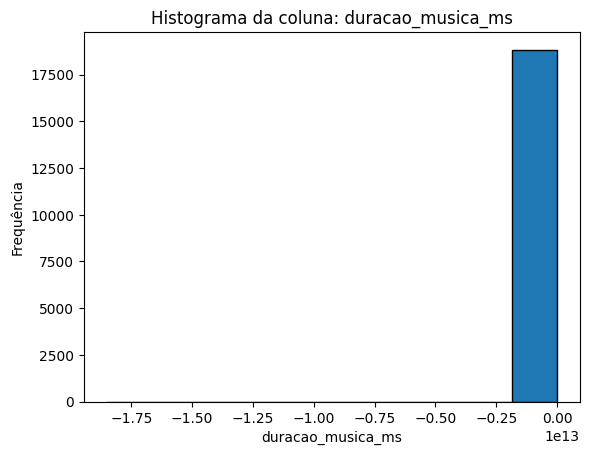

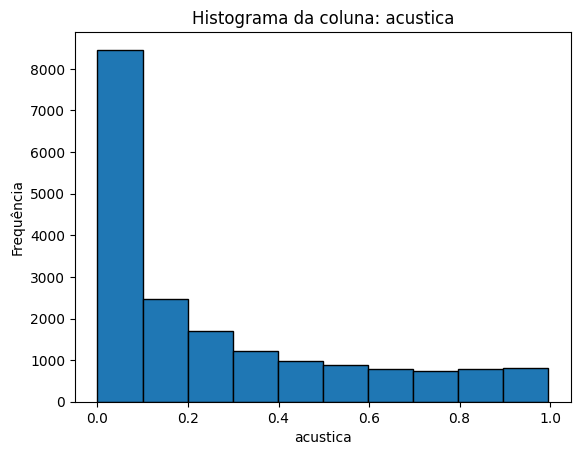

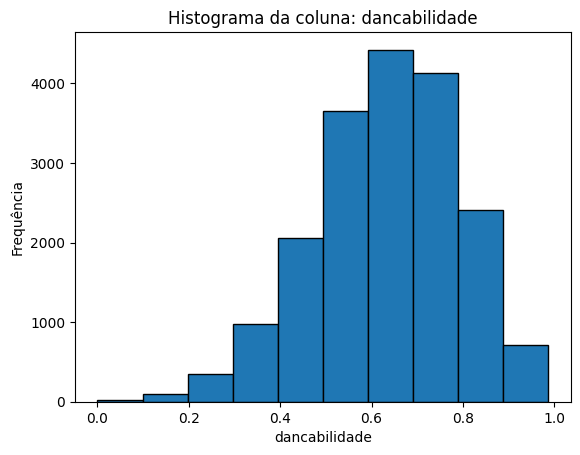

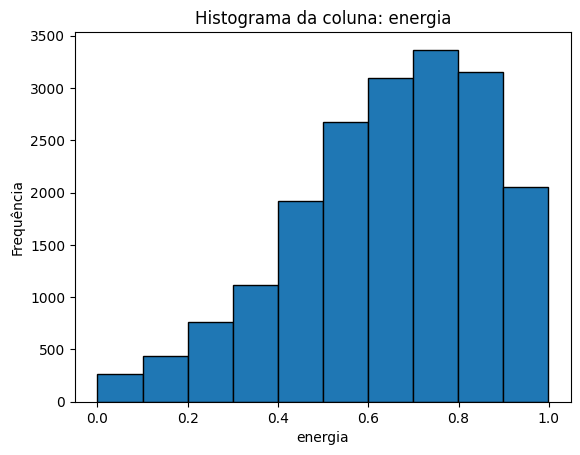

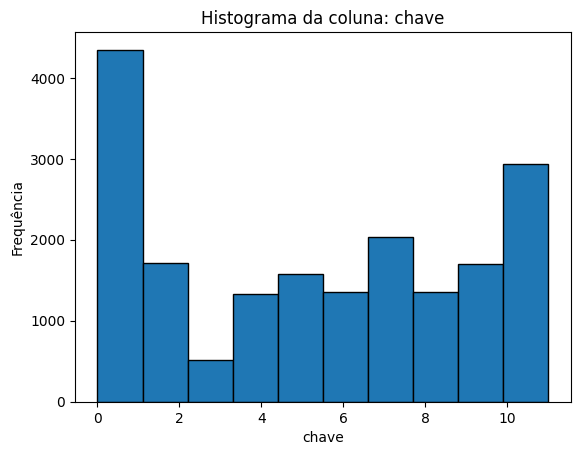

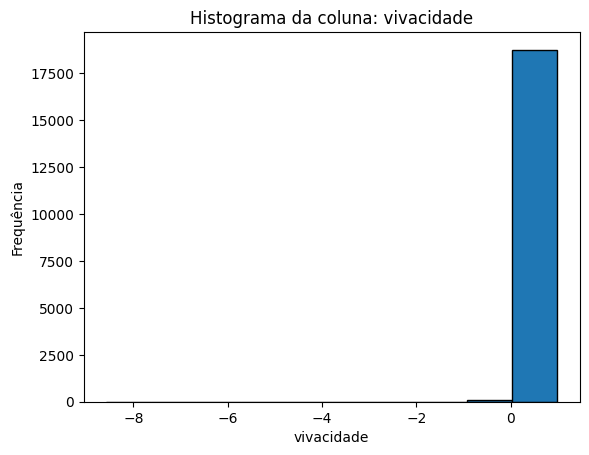

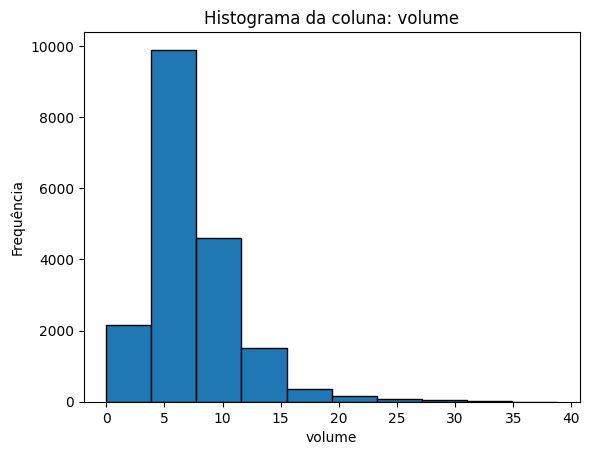

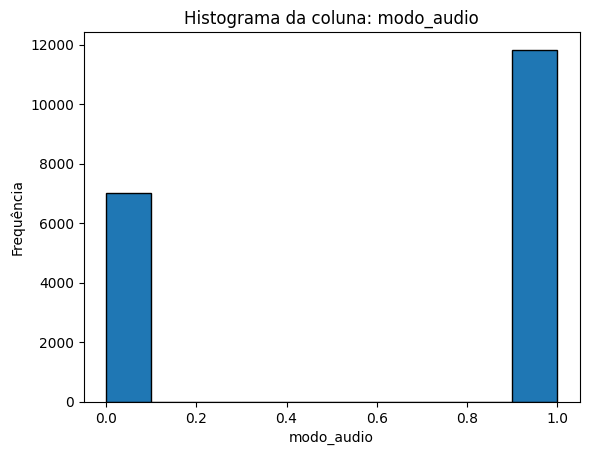

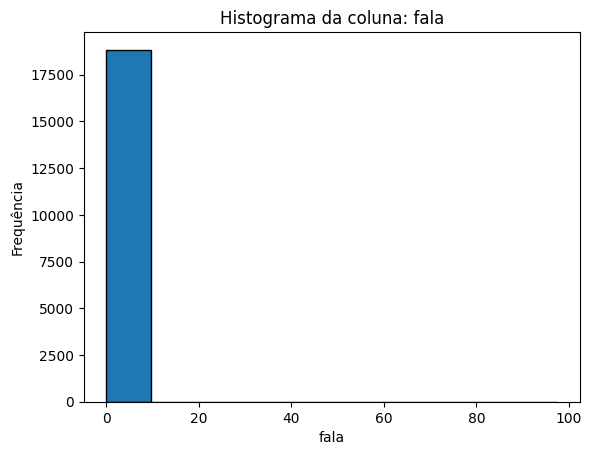

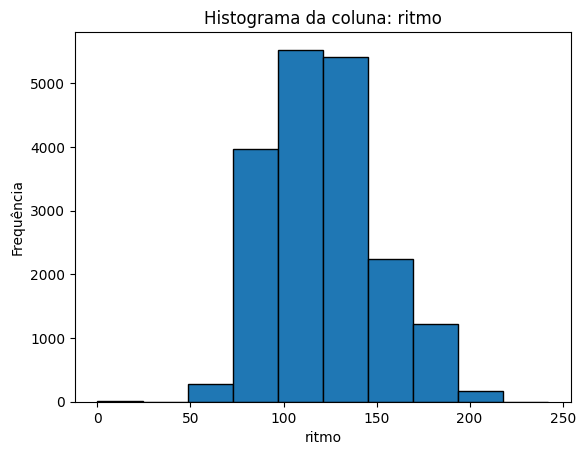

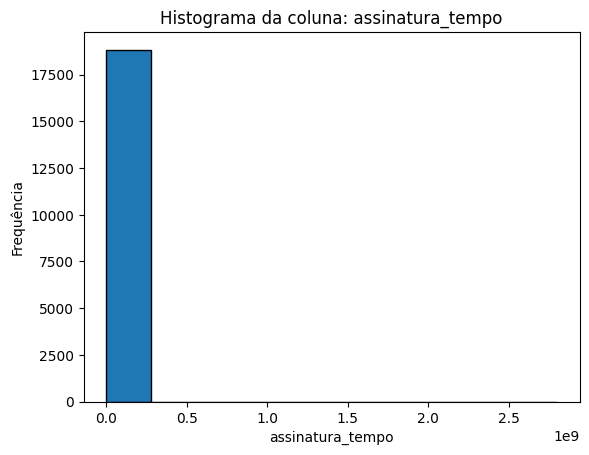

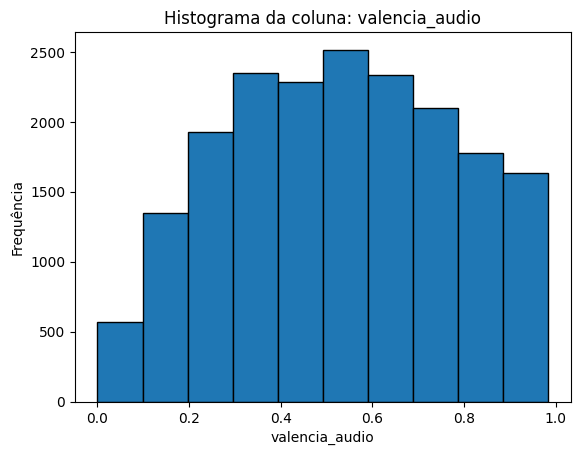

In [236]:
import matplotlib.pyplot as plt

for col in spotify.columns:
  plt.hist(spotify[col], bins=10, edgecolor='black')
  plt.title('Histograma da coluna: ' + col)
  plt.xlabel(col)
  plt.ylabel('Frequência')
  plt.show()

2. Boxplots para indentificar outiliers

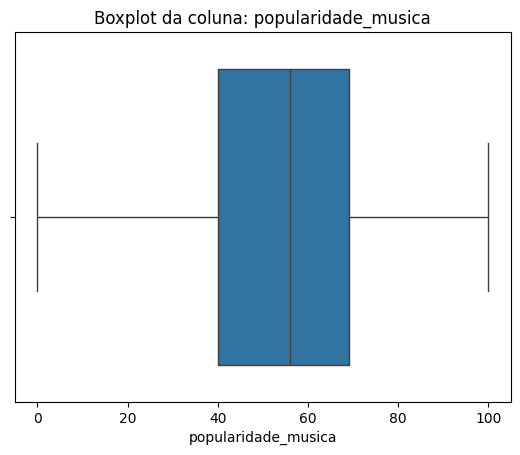

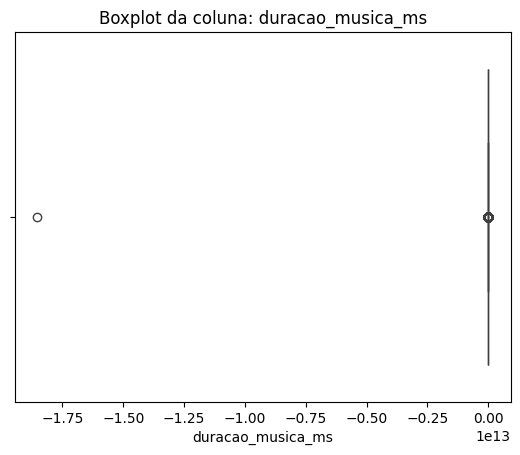

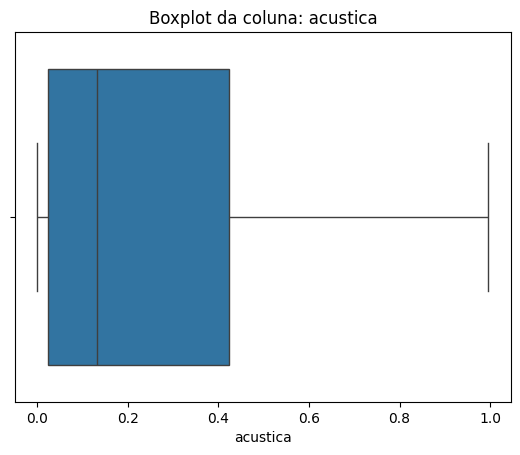

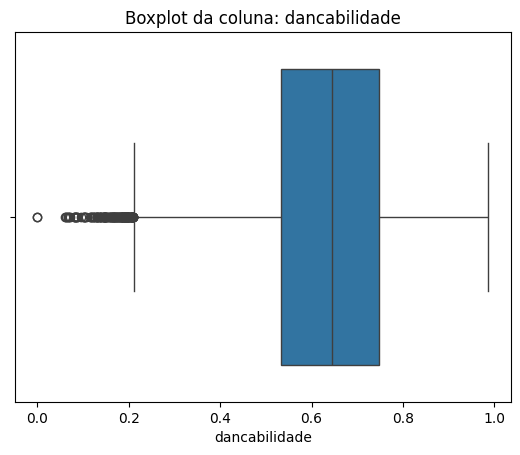

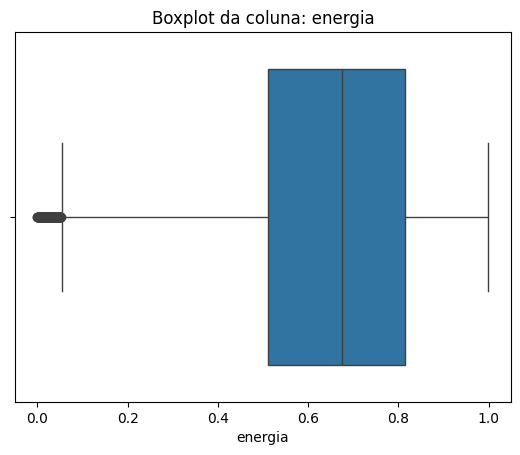

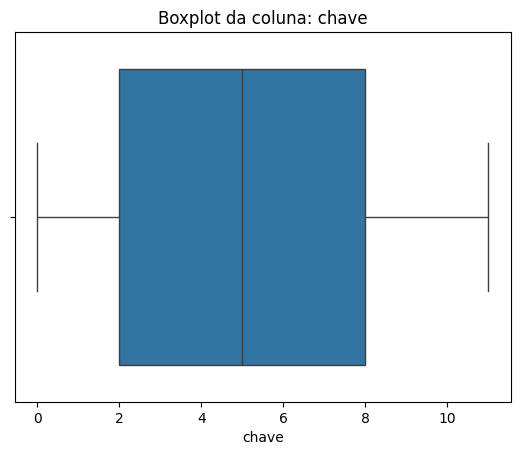

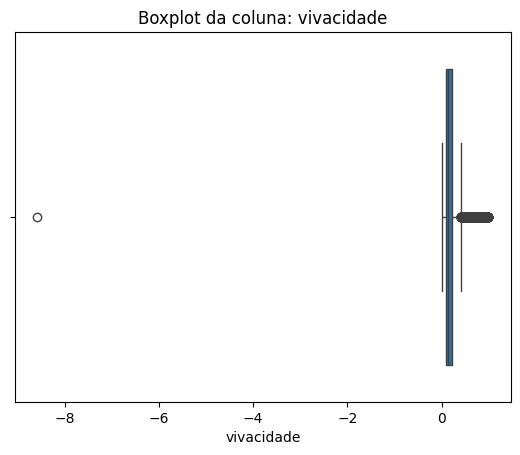

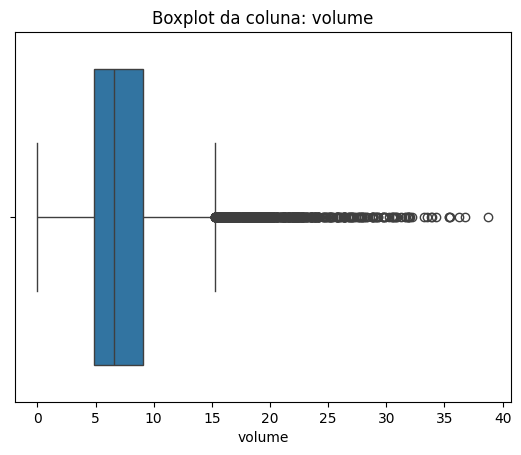

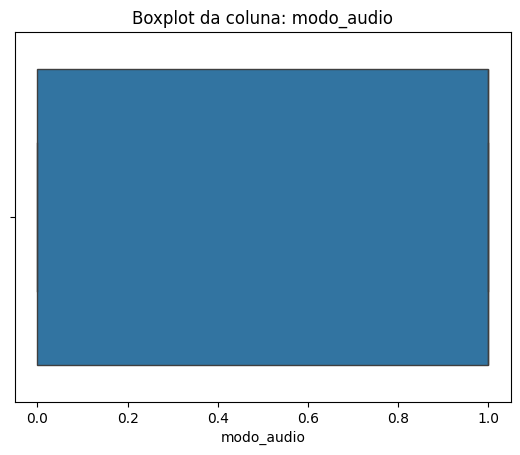

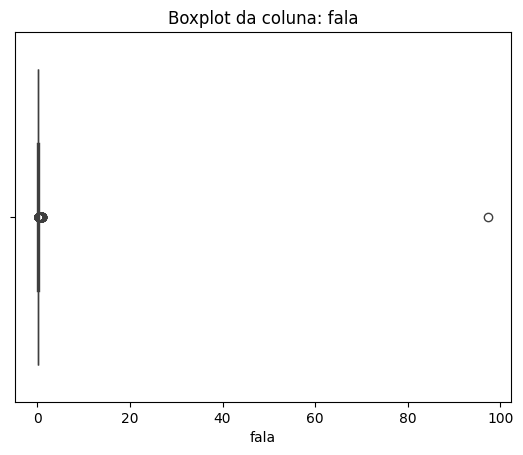

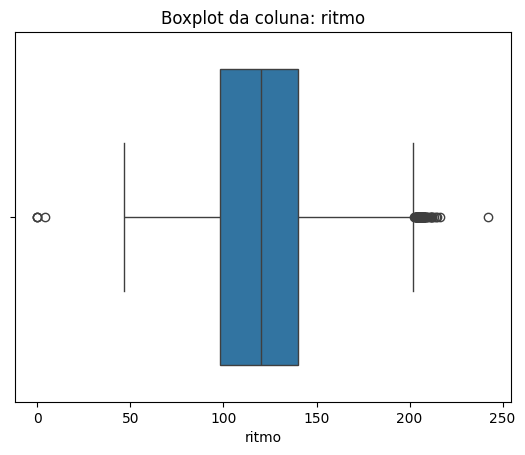

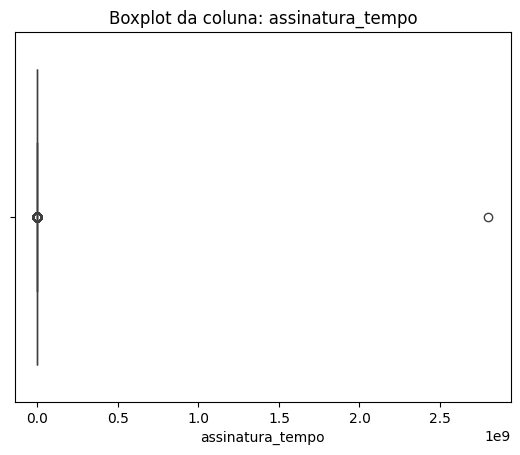

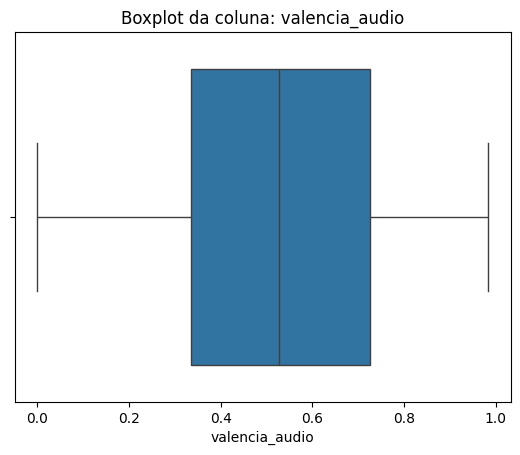

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in spotify.columns:
  sns.boxplot(x=spotify[col])
  plt.title('Boxplot da coluna: ' + col)
  plt.show()

4. excluir os outiliers encontrados

In [238]:
import numpy as np

columns_to_clean = ['duracao_musica_ms', 'dancabilidade', 'energia', 'volume', 'vivacidade', 'ritmo']

for col in columns_to_clean:

  Q1 = np.percentile(spotify[col], 25, interpolation='midpoint')
  Q3 = np.percentile(spotify[col], 75, interpolation='midpoint')
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  spotify = spotify[~((spotify[col] < lower_bound) | (spotify[col] > upper_bound))]

spotify.head()

,popularidade_musica,duracao_musica_ms,acustica,dancabilidade,energia,chave,vivacidade,volume,modo_audio,fala,ritmo,assinatura_tempo,valencia_audio
0,73.0,262333.0,0.005520,0.496,0.682,8.0,0.0589,4.095,1.0,0.0294,167.060,4.0,0.474
1,66.0,216933.0,0.010300,0.542,0.853,3.0,0.1080,6.407,0.0,0.0498,105.256,4.0,0.370
2,76.0,231733.0,0.008170,0.737,0.463,0.0,0.2550,7.828,1.0,0.0792,123.881,4.0,0.324
3,74.0,216933.0,0.026400,0.451,0.970,0.0,0.1020,4.938,1.0,0.1070,122.444,4.0,0.198
4,56.0,223826.0,0.000954,0.447,0.766,10.0,0.1130,5.065,1.0,0.0313,172.011,4.0,0.574


In [239]:
spotify.shape

(16055, 13)

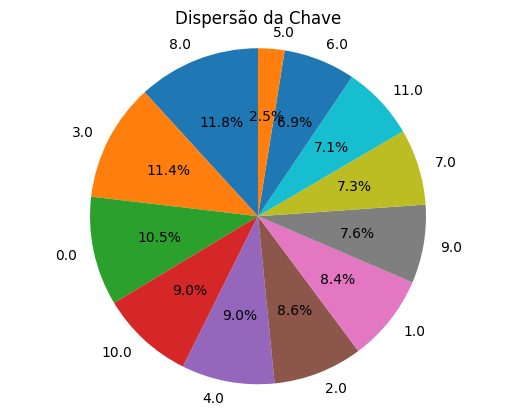

In [240]:
import matplotlib.pyplot as plt
labels = spotify['chave'].unique()
sizes = spotify['chave'].value_counts()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Dispersão da Chave')
plt.show()

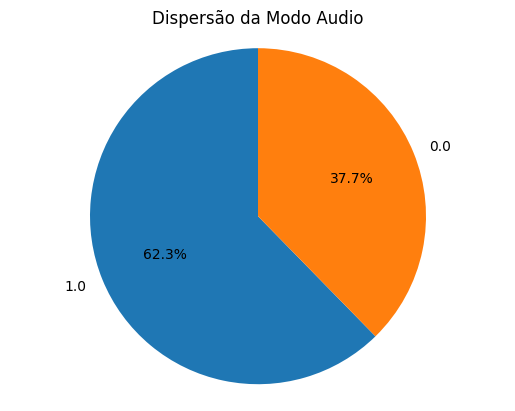

In [241]:
import matplotlib.pyplot as plt
labels = spotify['modo_audio'].unique()
sizes = spotify['modo_audio'].value_counts()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Dispersão da Modo Audio')
plt.show()

##Relacoes de variaveis

1. Visualizacao de um relacao, visando que quando mais energia a musica mais o volume é alto

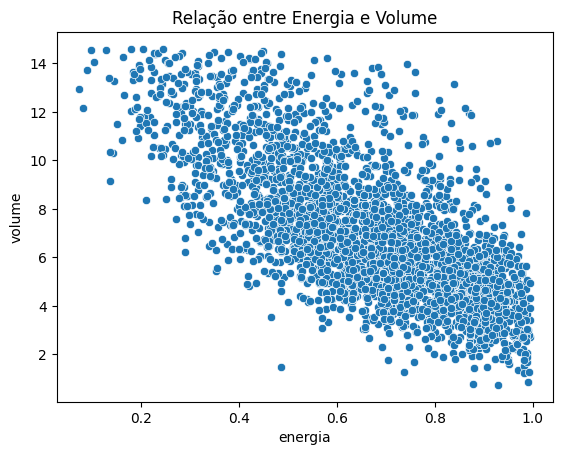

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

spotify_sample = spotify.sample(frac=0.2)

sns.scatterplot(data=spotify_sample, x="energia", y="volume")

plt.title("Relação entre Energia e Volume")
plt.xlabel("energia")
plt.ylabel("volume")

plt.show()

2. Heart mapa mostrando correlacao entreparametros, a acustica tbm é proxima linear com o volume e energia.

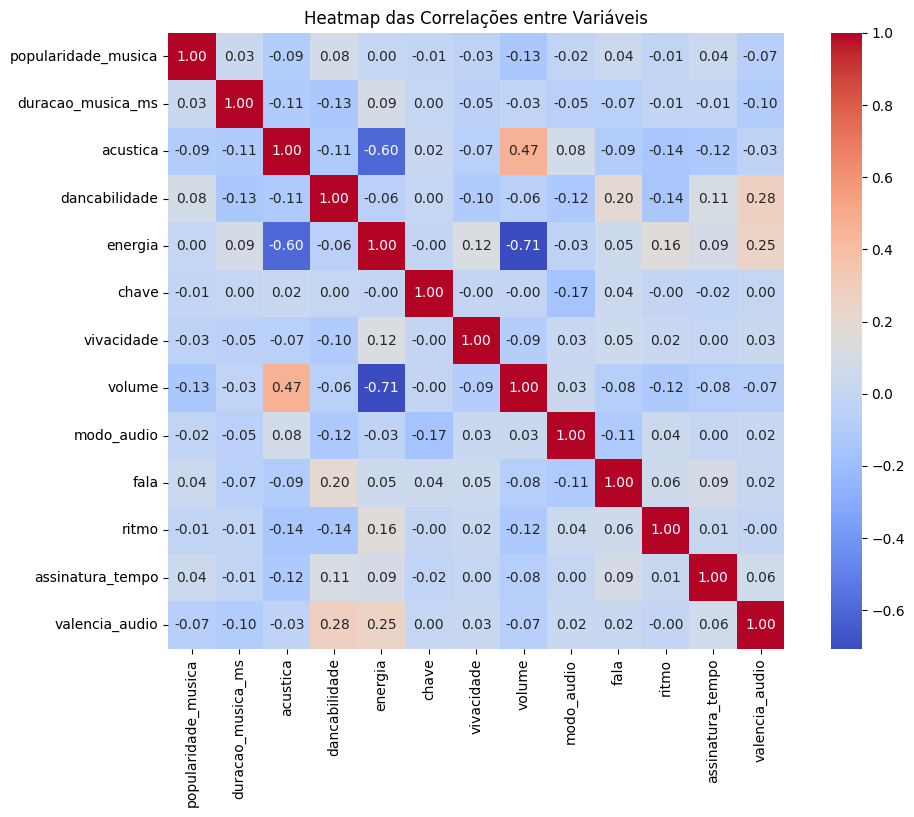

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(spotify_sample.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap das Correlações entre Variáveis")
plt.show()

In [244]:
spotify.drop(['acustica'], axis=1, inplace=True)
spotify

,popularidade_musica,duracao_musica_ms,dancabilidade,energia,chave,vivacidade,volume,modo_audio,fala,ritmo,assinatura_tempo,valencia_audio
0,73.0,262333.0,0.496,0.682,8.0,0.0589,4.095,1.0,0.0294,167.060,4.0,0.474
1,66.0,216933.0,0.542,0.853,3.0,0.1080,6.407,0.0,0.0498,105.256,4.0,0.370
2,76.0,231733.0,0.737,0.463,0.0,0.2550,7.828,1.0,0.0792,123.881,4.0,0.324
3,74.0,216933.0,0.451,0.970,0.0,0.1020,4.938,1.0,0.1070,122.444,4.0,0.198
4,56.0,223826.0,0.447,0.766,10.0,0.1130,5.065,1.0,0.0313,172.011,4.0,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...
18828,64.0,216173.0,0.515,0.286,5.0,0.1060,11.776,1.0,0.0378,115.076,4.0,0.284
18829,62.0,195106.0,0.644,0.523,4.0,0.0930,7.660,1.0,0.0378,95.966,4.0,0.445
18831,60.0,205666.0,0.495,0.161,11.0,0.1050,14.078,0.0,0.0301,94.286,4.0,0.265
18832,23.0,182211.0,0.719,0.325,0.0,0.1250,12.222,1.0,0.0355,130.534,4.0,0.286


In [245]:
spotify_grouped = spotify.groupby(['chave', 'modo_audio']).mean()

spotify_grouped.head()

popularidade_musica  duracao_musica_ms  dancabilidade  \
chave modo_audio                                                          
0.0   0.0                   54.106849      210386.345205       0.656600   
      1.0                   53.473251      214632.032236       0.634049   
1.0   0.0                   58.958730      212611.826984       0.674276   
      1.0                   55.217116      209431.939778       0.685692   
2.0   0.0                   49.425926      221220.311111       0.615189   

                   energia  vivacidade    volume      fala       ritmo  \
chave modo_audio                                                         
0.0   0.0         0.642164    0.160348  7.203178  0.104817  119.215573   
      1.0         0.661695    0.155102  6.943818  0.078550  120.894498   
1.0   0.0         0.678757    0.151247  6.421937  0.117175  119.053363   
      1.0         0.663611    0.150038  6.546633  0.132386  122.711055   
2.0   0.0         0.661299    0.151409  7.073707  0.094031  124.240985   

                  assinatura_tempo  valencia_audio  
chave modo_audio                                    
0.0   0.0                 3.964384        0.507744  
      1.0                 3.969822        0.546194  
1.0   0.0                 3.984127        0.552630  
      1.0                 3.988114        0.514247  
2.0   0.0                 3.933333        0.535849

In [246]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

spotify_normalized = scaler.fit_transform(spotify)

spotify_normalized = pd.DataFrame(spotify_normalized, columns=spotify.columns)

spotify_normalized.head()

,popularidade_musica,duracao_musica_ms,dancabilidade,energia,chave,vivacidade,volume,modo_audio,fala,ritmo,assinatura_tempo,valencia_audio
0,0.73,0.708426,0.359008,0.661758,0.727273,0.138588,0.280134,1.0,0.032450,0.781393,1.428571e-09,0.465353
1,0.66,0.514329,0.419060,0.844217,0.272727,0.254118,0.438295,0.0,0.054967,0.375932,1.428571e-09,0.356327
2,0.76,0.577603,0.673629,0.428084,0.000000,0.600000,0.535504,1.0,0.087417,0.498120,1.428571e-09,0.308104
3,0.74,0.514329,0.300261,0.969057,0.000000,0.240000,0.337803,1.0,0.118102,0.488693,1.428571e-09,0.176014
4,0.56,0.543798,0.295039,0.751387,0.909091,0.265882,0.346491,1.0,0.034547,0.813874,1.428571e-09,0.570186


In [247]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

X = spotify_normalized.drop('modo_audio', axis=1)
y = spotify_normalized['modo_audio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print("Accuracy: {:.2f}%".format(accuracy))
print("F1 Score: {:.2f}%".format(f1))

Accuracy: 62.82%
F1 Score: 77.16%


In [248]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=50, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
f1_rf = f1_score(y_test, y_pred_rf) * 100

print("Random Forest - Accuracy: {:.2f}%".format(accuracy_rf))
print("Random Forest - F1 Score: {:.2f}%".format(f1_rf))

Random Forest - Accuracy: 79.26%
Random Forest - F1 Score: 84.31%


In [249]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

y_pred_nn = model.predict(X_test)

y_pred_nn = (y_pred_nn > 0.5).astype(int)

accuracy_nn = accuracy_score(y_test, y_pred_nn) * 100
f1_nn = f1_score(y_test, y_pred_nn) * 100

print("Rede Neural - Accuracy: {:.2f}%".format(accuracy_nn))
print("Rede Neural - F1 Score: {:.2f}%".format(f1_nn))

Epoch 1/100
402/402 [==============================] - 2s 2ms/step - loss: 0.6453 - accuracy: 0.6303
Epoch 2/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6351 - accuracy: 0.6382
Epoch 3/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6298 - accuracy: 0.6428
Epoch 4/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6274 - accuracy: 0.6448
Epoch 5/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6260 - accuracy: 0.6493
Epoch 6/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6235 - accuracy: 0.6505
Epoch 7/100
402/402 [==============================] - 1s 3ms/step - loss: 0.6216 - accuracy: 0.6540
Epoch 8/100
402/402 [==============================] - 1s 3ms/step - loss: 0.6190 - accuracy: 0.6565
Epoch 9/100
402/402 [==============================] - 1s 4ms/step - loss: 0.6160 - accuracy: 0.6610
Epoch 10/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6142 - accura

In [251]:
# prompt: import o pkl e baixe o pkl da base treinada, focando a random forest classificatoria

import pickle
with open('model.pkl', 'wb') as f:
  pickle.dump(model_rf, f)

! gsutil cp model.pkl gs://colab-sample-bucket-804d404b-b408-4306-a046-782d08740e7a/model.pkl


BucketNotFoundException: 404 gs://colab-sample-bucket-804d404b-b408-4306-a046-782d08740e7a bucket does not exist.
